In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [35]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [36]:
W1 = tf.Variable(tf.random_normal(shape=[784, 256], stddev=0.01), name="w1val")
L1 = tf.nn.relu(tf.matmul(X, W1))

In [37]:
W2 = tf.Variable(tf.random_normal(shape=[256, 256], stddev=0.01), name="w2val")
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [38]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01), name="w3val")
model = tf.matmul(L2, W3)

In [39]:
param_list = [W1, W2, W3]
saver = tf.train.Saver(param_list)

In [40]:
im = Image.open("../넘파이 연습/temp.png")

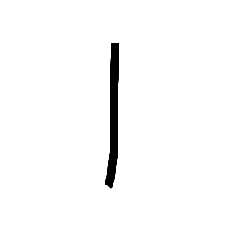

In [41]:
im

In [42]:
img2 = im.resize((28,28))
b = img2.tobytes("raw","A")
ll = [i/255 for i in b ]

In [43]:
len(ll)

784

In [44]:
ll = np.array(ll)
ll.shape

(784,)

In [45]:
ll = ll.reshape(1,784)
ll.shape

(1, 784)

In [46]:
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())  #변수를 초기화 해서 세팅이되면 파일에서 restore시 에러발생함
    saver.restore(sess, "./chkp_save2/mnist")
    predict = sess.run([model], feed_dict={X:ll})
    print(predict)
    predict = np.array(predict)
    print("shape:", predict.shape)
    print("result : ",np.argmax(predict[0], axis=1))

INFO:tensorflow:Restoring parameters from ./chkp_save2/mnist


NotFoundError: Key w3val_2 not found in checkpoint
	 [[Node: save_3/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_3/Const_0_0, save_3/RestoreV2_2/tensor_names, save_3/RestoreV2_2/shape_and_slices)]]

Caused by op 'save_3/RestoreV2_2', defined at:
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-c314ce792421>", line 2, in <module>
    saver = tf.train.Saver(param_list)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jaegyuhan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key w3val_2 not found in checkpoint
	 [[Node: save_3/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_3/Const_0_0, save_3/RestoreV2_2/tensor_names, save_3/RestoreV2_2/shape_and_slices)]]
